##### 1. Wrapper Method
> Greedy Search Algorithms 기반으로 특정 Machine Learning 알고리즘에 대해 최상의 결과를 얻을 수 있는 조합을 찾는 방법이다.  
> 가능한 모든 방법을 테스트하기 때문에, 학습 데이터가 매우클 경우 Calculating Cost 가 매우 큰 단점이있다.

Wrapper Method Feature Selection 크게 세가지 방법으로 구분하여 Step Forward, Step BackWard, Exhaustive 구분할 수 있다.
데이터 사이언스를 위한 기능 모음 패키지인 mlxtend를 사용하여 Wrapper Method 구현해보고자 한다.

Kaggle에서 제공하는 [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data)데이터를 활용하여,
Wrapper Methods Feature selection 을 수행해보자.

###### *Description*
BNP Paribas Cardif 청구관리 데이터 셋으로 고객의 클레임에 신속한 대처를 할 수 있게 클레임 여부를 판단하는 모형을 만들어내는 것이 목표이다.

In [2]:
# Feature Selection에 들어가기 앞서 Data Preprocessing을 수행
# 0. Data Preprocessing

import pandas
import numpy
from sklearn.model_selection import train_test_split

paribas_data = pandas.read_csv("../../../data/3.FeatureSelection/01.Wrapper/train.csv", nrows = 200)
print("----Raw Data Shape----")
print(paribas_data.shape)
# Numeric Columns 추출
num_columns = ['int16','int32', 'int64', 'float16', 'float32','float64']
numerical_columns = list(paribas_data.select_dtypes(include=num_columns).columns)
# 114개 연속형 변수만 추출
paribas_data = paribas_data[numerical_columns]
print("----Numerical Data Shape----")
print(paribas_data.shape)

# Split Train, Test Data Set
train_x, test_x, train_y, test_y = train_test_split(paribas_data.drop(labels=["ID","target"], axis=1),
                                                    paribas_data["target"],
                                                    test_size=0.2,
                                                    random_state=42)

# Correlation > |0.8| 인 컬럼 제거(Filter Method 사용)
correlated_features = set()
correlation_matrix = paribas_data.corr()

for idx, colname in enumerate(correlation_matrix):
    #print("-------")
    #print("{0} : {1}".format(idx, colname))
    for j in range(idx):
        #print(j)
        if abs(correlation_matrix.iloc[idx, j]) > 0.8:
            correlated_features.add(colname)

print(correlated_features)
print(len(correlated_features))

train_x.drop(labels=correlated_features, axis=1, inplace=True)
test_x.drop(labels=correlated_features, axis=1, inplace=True)

print("Train Shape : {0}, Test Shape : {1}".format(train_x.shape, test_x.shape))

----Raw Data Shape----
(200, 133)
----Numerical Data Shape----
(200, 114)
{'v81', 'v64', 'v123', 'v55', 'v65', 'v73', 'v121', 'v93', 'v76', 'v92', 'v115', 'v89', 'v48', 'v59', 'v84', 'v87', 'v126', 'v46', 'v118', 'v122', 'v106', 'v32', 'v109', 'v98', 'v128', 'v60', 'v67', 'v86', 'v103', 'v105', 'v117', 'v96', 'v12', 'v28', 'v100', 'v21', 'v54', 'v83', 'v124', 'v130', 'v43', 'v111', 'v40', 'v37', 'v68', 'v116', 'v53', 'v41', 'v49', 'v114', 'v25', 'v63', 'v61', 'v95', 'v77', 'v108', 'v104'}
57
Train Shape : (160, 55), Test Shape : (40, 55)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# mlxtend
# A Python Library with Intersting Tools for Data Science
from mlxtend.feature_selection import SequentialFeatureSelector
#1. Step Forward Feature Selection(SFS)
# SequentialFeatureSelector를 사용한 Feature Selection
# 적합시킬 모델은 RandomForest Classifier에
# k_feature : 선택할 변수의 갯수(int)
# forward : step forward selection(True/false)
# verbose : logging level parameter(int)
# scoring : performance evaluation criteria and finally(string)
# cv : cross validation folds(int)
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=10, n_jobs=-1),
                                            k_features=5,
                                            forward=True,
                                            verbose=2,
                                            scoring='roc_auc',
                                            cv=4)

# Step Forward Feature Selection
features = feature_selector.fit(numpy.array(train_x.fillna(0)), train_y)

# Selected Feature
filtered_features = train_x.columns[list(features.k_feature_idx_)]
print(filtered_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.7min finished

[2021-07-06 13:21:00] Features: 1/5 -- score: 0.6266769729350319[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  1.6min finished

[2021-07-06 13:22:36] Features: 2/5 -- score: 0.6471830158899302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.0min finished

[2021-07-06 13:24:38] Features: 3/5 -- score: 0.6769255999998907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Index(['v10', 'v23', 'v38', 'v50', 'v129'], dtype='object')


[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  2.6min finished

[2021-07-06 13:30:10] Features: 5/5 -- score: 0.6672852887557451

In [4]:
# modeling with filtered features

clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_x[filtered_features].fillna(0), train_y)
train_pred = clf.predict_proba(train_x[filtered_features].fillna(0))
print('Accuracy Train Set : {}'.format(roc_auc_score(train_y, train_pred[:,1])))

test_pred = clf.predict_proba(test_x[filtered_features].fillna(0))
print('Accuracy Train Set : {}'.format(roc_auc_score(test_y, test_pred[:,1])))

Accuracy Train Set : 0.7015030227203434
Accuracy Train Set : 0.7045711191866473
Accuracy Train Set : 0.7015030227203434
Accuracy Train Set : 0.7045711191866473


In [5]:
result = pandas.DataFrame.from_dict(features.get_metric_dict()).T
print(result)
result.to_csv("SFS_result.csv",index=False)

           feature_idx                                          cv_scores  \
1                 (8,)  [0.6226707395177802, 0.6315323139255412, 0.624...   
2              (8, 31)  [0.6495408564438854, 0.6452232378892845, 0.645...   
3          (8, 18, 31)  [0.6741671824108526, 0.6713043090777824, 0.683...   
4      (8, 18, 31, 55)  [0.6521134445123267, 0.6588058532070914, 0.662...   
5  (8, 18, 27, 31, 55)  [0.6671076804116082, 0.6687994086533074, 0.669...   

  avg_score        feature_names  ci_bound   std_dev   std_err  
1  0.626677                 (8,)  0.005467   0.00341  0.001969  
2  0.647183              (8, 31)   0.00311   0.00194   0.00112  
3  0.676926          (8, 18, 31)  0.007262   0.00453  0.002615  
4  0.657617      (8, 18, 31, 55)  0.006041  0.003769  0.002176  
5  0.667285  (8, 18, 27, 31, 55)  0.003139  0.001958  0.001131  


[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.6min finished

[2021-07-06 13:38:26] Features: 1/15 -- score: 0.6271481626317197[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  1.7min finished

[2021-07-06 13:40:10] Features: 2/15 -- score: 0.6492631534510429[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.1min finished

[2021-07-06 13:42:14] Features: 3/15 -- score: 0.6758021846655323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.0min finished

[2021-07-06 13:45:13] Features: 4/15 -

                                          feature_idx  \
1                                                (8,)   
2                                             (8, 31)   
3                                         (8, 18, 31)   
4                                     (8, 18, 31, 55)   
5                                 (8, 18, 27, 31, 55)   
6                             (8, 18, 24, 27, 31, 55)   
7                         (8, 18, 24, 27, 31, 47, 55)   
8                     (8, 18, 24, 27, 31, 40, 47, 55)   
9                  (8, 9, 18, 24, 27, 31, 40, 47, 55)   
10             (8, 9, 18, 22, 24, 27, 31, 40, 47, 55)   
11         (8, 9, 18, 22, 24, 27, 31, 40, 47, 52, 55)   
12     (8, 9, 18, 22, 24, 27, 31, 40, 47, 50, 52, 55)   
13  (8, 9, 18, 22, 24, 27, 31, 40, 47, 48, 50, 52,...   
14  (8, 9, 18, 22, 24, 27, 31, 40, 46, 47, 48, 50,...   
15  (8, 9, 18, 22, 24, 27, 31, 40, 46, 47, 48, 50,...   

                                            cv_scores avg_score  \
1   [0.6221089830923

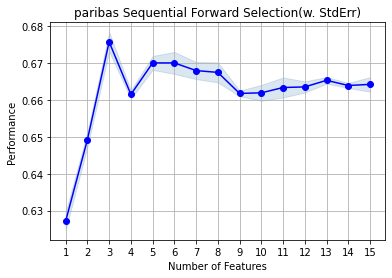

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.6min finished

[2021-07-06 14:19:42] Features: 1/15 -- score: 0.6275997305814526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  1.8min finished

[2021-07-06 14:21:29] Features: 2/15 -- score: 0.6491950285494446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.1min finished

[2021-07-06 14:23:35] Features: 3/15 -- score: 0.6755691199981676[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

                                          feature_idx  \
1                                                (8,)   
2                                             (8, 31)   
3                                         (8, 18, 31)   
4                                     (8, 18, 27, 31)   
5                                 (8, 18, 27, 31, 55)   
6                             (8, 18, 24, 27, 31, 55)   
7                         (8, 18, 24, 27, 31, 40, 55)   
8                     (8, 18, 24, 27, 31, 37, 40, 55)   
9                 (8, 18, 24, 27, 28, 31, 37, 40, 55)   
10            (8, 16, 18, 24, 27, 28, 31, 37, 40, 55)   
11        (8, 13, 16, 18, 24, 27, 28, 31, 37, 40, 55)   
12    (8, 12, 13, 16, 18, 24, 27, 28, 31, 37, 40, 55)   
13  (8, 12, 13, 16, 18, 24, 27, 28, 31, 37, 40, 46...   
14  (8, 12, 13, 15, 16, 18, 24, 27, 28, 31, 37, 40...   
15  (7, 8, 12, 13, 15, 16, 18, 24, 27, 28, 31, 37,...   

                                            cv_scores avg_score  \
1   [0.6224179457075

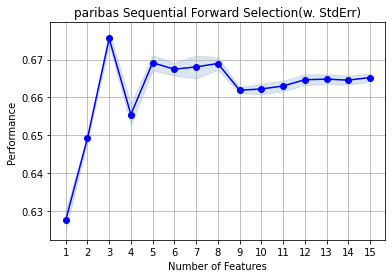

In [7]:
# k_features 증가
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=10, n_jobs=-1),
                                            k_features=15,
                                            forward=True,
                                            verbose=2,
                                            scoring='roc_auc',
                                            cv=4)
features = feature_selector.fit(numpy.array(train_x.fillna(0)), train_y, custom_feature_names= train_x.columns)

result = pandas.DataFrame.from_dict(features.get_metric_dict()).T
#print(result)
result.to_csv("SFS_total_result.csv",index=False)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(features.get_metric_dict(), kind = 'std_err')
plt.title("paribas Sequential Forward Selection(w. StdErr)")
plt.grid()
plt.show()

In [ ]:
# 2. Step Backward Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=10, n_jobs=-1),
                                             k_features=15,
                                             forward=False,
                                             verbose=2,
                                             scoring='roc_auc',
                                             cv=4)

features = feature_selector.fit(numpy.array(train_x.fillna(0)), train_y, custom_feature_names= train_x.columns)

filtered_features = train_x.columns[list(features.k_feature_idx_)]

# modeling
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_x[filtered_features].fillna(0), train_y)

train_pred = clf.predict_proba(train_x[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_y, train_pred[:,1])))

test_pred = clf.predict_proba(test_y[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_y, test_pred [:,1])))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  6.9min finished

[2021-07-06 15:04:04] Features: 56/15 -- score: 0.6601849559501741[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  6.8min finished

[2021-07-06 15:10:50] Features: 55/15 -- score: 0.6588519349825982[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  6.8min finished

[2021-07-06 15:17:37] Features: 54/15 -- score: 0.6603030234946778[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
# 3. Exhaustive Feature Selection

from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Selector Algorithm
feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                             min_features = 1,
                                             max_features= 3,
                                             scoring = 'roc_auc',
                                             print_progress=True,
                                             cv=2)
# ExhaustiveFeatureSelector는 LogLevel도 없고 결과가 출력이 ??????
print("Seletor Fit")
# Selector Fit
features = feature_selector.fit(numpy.array(train_x.fillna(0)), train_y,custom_feature_names= train_x.columns)
print("select Feature adjust")
# Filtering Feature
filtered_features = train_x.columns[list(features.k_features_idx_)]



Seletor Fit


In [ ]:
print("Modeling")
# Modeling
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_x[filtered_features].fillna(0), train_y)

train_pred = clf.predict_proba(train_x[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_y, train_pred[:,1])))

test_pred = clf.predict_proba(test_x[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_y, test_pred [:,1])))


In [ ]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
from mlxtend.feature_selection import ExhaustiveFeatureSelector
#data = pandas.read_csv("../../../data/3.FeatureSelection/01.Wrapper/train.csv", nrows = 200)

from sklearn.ensemble import RandomForestClassifier

efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
                                min_features=4,
                                max_features=10,
                                scoring='roc_auc',
                                cv=2)

efs = efs.fit(train_x.fillna(0), train_y)
selected_feature = train_x.columns[list(efs.k_feature_idx_)]
print(selected_feature)

print(efs.k_score_)
x_train_sfs = efs.transform(train_x)
x_test_sfs = efs.transform(test_x)

#### Recursive Feature Elimination
RFE는 매우 직관적인 Feature Selection 방법으로 먼저 전체 Feature에 대해 훈련후 중요하지 않은 Feature들을 제거하면서 원하는 개수의 Feature 수만 남기는 방법이다.  
따라서 원하는 수의 Feature만 사용하는 minimal optimal Feature Subset을 구하는 간단한 방법이라고 볼 수 있으며, 중요하지 않은 Feature를 매 단계마다 하나씩 줄이면서 모델을 새로 빌딩하는 과정을 반복한다.  
Scikit-learn에 제공하는 RFE 함수로 구현할 수 있다.  

구현 순서는 1) 클래스 선언 , 2) fit, 3) transform의 과정으로 진행하며, **Feature_imnportance_ 속성을 지원하는 의사결정나무 기반의 다양한 모델에 Wrapper로서 사용이 가능하다.**
<br>
> 1. estimator : Feature importance가 계산 가능한 모델
> 2. n_feature_to_select : 남겨질 중요한 Feature의 수를 선언하며 지정되지 않을 경우 원래 Feature의 절반을 선택
> 3. step : 각 단계 마다 제거될 Feature의 수를 선언

Feature SElection이 진행된 이후 다음과 같은 속성을 지원  
> 1. estimator_ : 선택된 Feature들로만 훈련된 Estimator
> 2. n_features_ : 선택된 Feature의 개수
> 3. ranking_ : 각 Feature의 순위이며 선택된 Feature는 1
> 4. support_ : 선택된 Feature를 가리키는 마스크를 리턴



In [6]:
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

X, y = make_classification(n_samples = 1000, n_features=20, n_informative=5, n_redundant=5)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X,y)
# summarize all feature
for i in range(X.shape[1]):
    print('Columns : %d, Selected %s, Rank : %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))




Columns : 0, Selected False, Rank : 9.000
Columns : 1, Selected False, Rank : 11.000
Columns : 2, Selected False, Rank : 7.000
Columns : 3, Selected False, Rank : 5.000
Columns : 4, Selected False, Rank : 14.000
Columns : 5, Selected False, Rank : 16.000
Columns : 6, Selected False, Rank : 10.000
Columns : 7, Selected False, Rank : 12.000
Columns : 8, Selected False, Rank : 3.000
Columns : 9, Selected False, Rank : 8.000
Columns : 10, Selected False, Rank : 6.000
Columns : 11, Selected False, Rank : 2.000
Columns : 12, Selected False, Rank : 13.000
Columns : 13, Selected True, Rank : 1.000
Columns : 14, Selected False, Rank : 4.000
Columns : 15, Selected True, Rank : 1.000
Columns : 16, Selected True, Rank : 1.000
Columns : 17, Selected True, Rank : 1.000
Columns : 18, Selected True, Rank : 1.000
Columns : 19, Selected False, Rank : 15.000


In [8]:
# cross Validation을 통해 선택할 Feature의 개수를 자동으로 선택할 수 있다. 
# Sklearn 의 RFECV를 통해 수행가능하다datetime A combination of a date and a time. Attributes: ()
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

# define Dataset
X, y= make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfe = RFECV(estimator=DecisionTreeClassifier(), cv=cv)
rfe.fit(X,y)


#Summarize all features
for i in range(X.shape[1]):
    print('Columns : %d, Selected %s, Rank : %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))


Columns : 0, Selected False, Rank : 3.000
Columns : 1, Selected True, Rank : 1.000
Columns : 2, Selected False, Rank : 4.000
Columns : 3, Selected False, Rank : 8.000
Columns : 4, Selected True, Rank : 1.000
Columns : 5, Selected False, Rank : 7.000
Columns : 6, Selected False, Rank : 2.000
Columns : 7, Selected True, Rank : 1.000
Columns : 8, Selected False, Rank : 13.000
Columns : 9, Selected False, Rank : 10.000
Columns : 10, Selected False, Rank : 11.000
Columns : 11, Selected True, Rank : 1.000
Columns : 12, Selected False, Rank : 6.000
Columns : 13, Selected True, Rank : 1.000
Columns : 14, Selected False, Rank : 15.000
Columns : 15, Selected False, Rank : 12.000
Columns : 16, Selected False, Rank : 14.000
Columns : 17, Selected False, Rank : 5.000
Columns : 18, Selected False, Rank : 9.000
Columns : 19, Selected True, Rank : 1.000


In [19]:
print(numpy.where(rfe.support_)[0])
# 선택된 컬럼 인덱스
# numpy.where(rfe.support_)[0]


## Train, Test Set 모두 변환 하여 사용 
X_transformed = rfe.transform(X)


print(X_transformed.shape)
print(X_transformed)


[ 1  4  7 11 13 19]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'